In [4]:
# !pip install onnxruntime
# !pip install matplotlib
# !pip install opencv-python

import datetime
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os

from scrfd_detector import SCRFD,distance2bbox,distance2kps

In [5]:
if not cv2.cuda.getCudaEnabledDeviceCount():
    print("CUDA GPU를 사용할 수 없습니다.")
else:
    print("CUDA GPU를 사용할 수 있습니다.")

CUDA GPU를 사용할 수 없습니다.


# 1. Face Detector 불러오기

In [6]:
# 8개의 모델 중, 필요에 따라 하나의 모델 선정

detector = SCRFD(model_file='./onnx/scrfd_500m.onnx')
detector = SCRFD(model_file='./onnx/scrfd_1g.onnx')
detector = SCRFD(model_file='./onnx/scrfd_2.5g.onnx')
detector = SCRFD(model_file='./onnx/scrfd_10g.onnx')
detector = SCRFD(model_file='./onnx/scrfd_34g.onnx')
#detector = SCRFD(model_file='./onnx/scrfd_500m_bnkps.onnx')
#detector = SCRFD(model_file='./onnx/scrfd_2.5g_bnkps.onnx')
#detector = SCRFD(model_file='./onnx/scrfd_10g_bnkps.onnx')
detector.prepare(-1)

# landmark_model = dlib.shape_predictor("./onnx/shape_predictor_68_face_landmarks.dat")

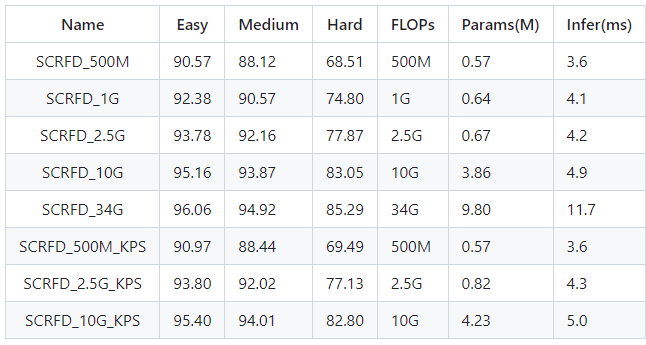

# 2. 이미지에 대한 Face Detection 테스트

In [15]:
def detection(img_paths):
    
    path = 'tests/data/'
    
    for img_path in img_paths:
        
        # img_path = '1.jpg'
    
        img = cv2.imread(path+img_path)
        
        faceArea_list = list()

        for _ in range(1):
            ta = datetime.datetime.now()
            bboxes, kpss = detector.detect(img, 0.5, input_size = (640, 640))
            #bboxes, kpss = detector.detect(img, 0.5)
            tb = datetime.datetime.now()
            print('all cost:', (tb-ta).total_seconds()*1000)

        print(img_path, bboxes.shape)

        if kpss is not None:
            print(kpss.shape)

        for i in range(bboxes.shape[0]):
            bbox = bboxes[i]
            x1,y1,x2,y2,score = bbox.astype(np.int32)

            faceArea = img[y1:y2, x1:x2].copy()
            faceArea_list.append(faceArea)

            cv2.rectangle(img, (x1,y1), (x2,y2) , (0,0,255) , 5)
            

            # Open CV 이미지를 dlib용 사각형으로 변환
            ## (참조) https://studiou.tistory.com/4

#             dlib_rect = dlib.rectangle(x1,y1,x2,y2)

#             list_points = []
#             for p in landmark_model(img, dlib_rect).parts():
#                 list_points.append([p.x, p.y])

#             list_points = np.array(list_points)

            # 포인트 출력
            ## 만약 눈만 display 하고 싶을 경우
            ## landmarks_display = landmarks[RIGHT_EYE_POINTS, LEFT_EYE_POINTS]
    #         index = list(range(0, 68))
    #         for idx, point in enumerate(list_points[index]):
    #             pos = (point[0], point[1])
    #             cv2.circle(img, pos, 1, color=(0,255,255), thickness= 30)

    #         if kpss is not None:
    #             kps = kpss[i]
    #             for kp in kps:
    #                 kp = kp.astype(np.int32)
    #                 cv2.circle(img, tuple(kp) , 1, (0,0,255) , 2)

        filename = img_path.split('/')[-1]
        filename_split = str(os.path.splitext(filename)[0])        
        dir_path = 'outputs/' + filename_split
        
#         if not os.path.exists(dir_path):
#             os.makedirs(dir_path)
        
        cv2.imwrite('outputs/%s'%filename, img)
        
        
        if not os.path.exists(dir_path):
            os.makedirs(dir_path)
        
        
        i=0
        for face in faceArea_list:
            height, width, c = face.shape
            size = "_(" + str(width) + "," + str(height) + ")"
            cv2.imwrite(dir_path + "/" + str(i) + size +".jpg", face)
            i = i+1
        
        
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)    

In [16]:
path = 'tests/data/'

img_paths = os.listdir(path)

detection(img_paths)

all cost: 2408.7839999999997
1.jpg (1, 5)
all cost: 1968.572
1.jpg (1, 5)
all cost: 1592.162
1.jpg (1, 5)
all cost: 2190.377
1.jpg (1, 5)
all cost: 2745.098
1.jpg (1, 5)
all cost: 2335.313
1.jpg (1, 5)
all cost: 1919.0149999999999
1.jpg (1, 5)
all cost: 2103.671
1.jpg (1, 5)
all cost: 2253.755
1.jpg (1, 5)
all cost: 1616.95
1.jpg (1, 5)
all cost: 1536.078
1.jpg (1, 5)
all cost: 1966.503
1.jpg (1, 5)
all cost: 1864.784
1.jpg (1, 5)
all cost: 1682.202
1.jpg (1, 5)
all cost: 1830.615
1.jpg (1, 5)
all cost: 1609.14
1.jpg (1, 5)
all cost: 1713.68
1.jpg (1, 5)
all cost: 1872.6290000000001
1.jpg (1, 5)
all cost: 1934.441
1.jpg (1, 5)
all cost: 1887.175
1.jpg (1, 5)
all cost: 1769.114
1.jpg (1, 5)
all cost: 1634.27
1.jpg (1, 5)
all cost: 1720.197
1.jpg (1, 5)
all cost: 2148.9440000000004
1.jpg (1, 5)
all cost: 1807.7749999999999
1.jpg (1, 5)
all cost: 1870.832
1.jpg (1, 5)
all cost: 1805.089
1.jpg (1, 5)
all cost: 1996.713
1.jpg (1, 5)
all cost: 1705.072
1.jpg (1, 5)
all cost: 1993.935
1.jpg (

KeyboardInterrupt: 

In [9]:
# ## 얼굴 영역 추출
# fig = plt.figure()
# # rows = len(faceArea_list)
# # cols = 1

# rows = 13
# cols = 5
# i = 1

# # print(len(faceArea_list))

# for img in faceArea_list:
    
#     # 얼굴영역 size
#     height, width, c = img.shape
    
#     print("width = ", width)
#     print("height = ", height)
    
#     ax = fig.add_subplot(rows, cols, i)
#     ax.set_xlabel(str(width) + " x " + str(height))
#     ax.set_xticks([]), ax.set_yticks([])
    
#     ax.imshow(img)
    
#     fig.set_figheight(10)
#     fig.set_figwidth(5)
#     fig.tight_layout()
#     i += 1

In [10]:
# img_paths = ['tests/data/294.jpg']

# for img_path in img_paths:
    
#     img = cv2.imread(img_path)
    
#     bbox = cv2.selectROI(img,False,False) # 출력 (topLeftX,topLeftY, witdh, heigth)
        
#     # 선택한 영역의 좌표와 크기를 출력
#     x,y,w,h = bbox
#     print("Selected ROI:", x,y,w,h)
    
#     # 선택한 영역
#     roi = img[y:y+h, x:x+w]
    
#     cv2.imshow('ROI', img)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()

# 3. 동영상 테스트
## Q를 통해 비디오 종료

In [11]:
# video_path = 'tests/data/video_2.mp4'

# video = cv2.VideoCapture(video_path)
# width = video.get(cv2.CAP_PROP_FRAME_WIDTH)
# height = video.get(cv2.CAP_PROP_FRAME_HEIGHT)
# fps = video.get(cv2.CAP_PROP_FPS)

# length = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
# print("비디오 길이 = " , length)

# #저장할 비디오 코덱
# fourcc = cv2.VideoWriter_fourcc(*'DIVX')

# #저장할 비디오 파일 이름
# filename = 'tests/data/hi_detect.avi'

# out = cv2.VideoWriter(filename, fourcc, fps, (int(width), int(height)))

In [12]:
# # 폰트 및 텍스트 설정
# font = cv2.FONT_HERSHEY_SIMPLEX
# text_position = (50, 50)  # 텍스트 위치 (x, y)
# font_scale = 1
# font_color = (255, 255, 255)  # 텍스트 색상 (BGR)
# thickness = 2  # 텍스트 두께

# while(video.isOpened()):
    
#     text = ""
#     ret, img = video.read()    

#     # 동영상 끝까지 재생하면 루프 종료
#     if not ret:
#         break
            
#     for _ in range(1):
#         bboxes, kpss = detector.detect(img, 0.5, input_size = (640, 640))
        
        
#     for i in range(bboxes.shape[0]):
#         bbox = bboxes[i]
#         x1,y1,x2,y2,score = bbox.astype(np.int32)
#         cv2.rectangle(img, (x1,y1)  , (x2,y2) , (255,0,0) , 2)
#         # 동영상 상단에 텍스트 추가
#         text = 'Width : ' + str(x2-x1) + ", Height : " + str(y2-y1)  # 원하는 텍스트 입력
#         frame_with_text = cv2.putText(img, text, text_position, font, font_scale, font_color, thickness)
        
#         # print("Bounding box 넓이 == ", abs(x1-x2))
#         # print("Bounding box 높이 == ", abs(y1-y2))
        
#         ######## landmark extraction ######
#         dlib_rect = dlib.rectangle(x1,y1,x2,y2)
#         list_points = []
#         for p in landmark_model(img, dlib_rect).parts():
#             list_points.append([p.x, p.y])
        
#         list_points = np.array(list_points)
    
    
    
#     cv2.imshow('Face detector', img)
#     out.write(img)
    
#     if length == int(video.get(1)):
#         break;
    
#     # Press 'q' to quit
#     if cv2.waitKey(1) == ord('q'):
#         break


# # Clean up
# video.release()
# out.release()
# cv2.destroyAllWindows()

In [13]:
#         # 포인트 출력
#         ## 만약 눈만 display 하고 싶을 경우
#         ## landmarks_display = landmarks[RIGHT_EYE_POINTS, LEFT_EYE_POINTS]
#         index = list(range(0, 68))
#         for idx, point in enumerate(list_points[index]):
#             pos = (point[0], point[1])
#             cv2.circle(img, pos, 2, color=(0,255,255), thickness= -1)
#         ######## End ######
        
#         if kpss is not None:
#             kps = kpss[i]
#             for kp in kps:
#                 kp = kp.astype(np.int32)
#                 cv2.circle(img, tuple(kp) , 1, (0,0,255) , 2)